___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [14]:
bike=pd.read_csv("/content/drive/MyDrive/Pythonders/store_sharing.csv")

### 2.Read dataset

In [4]:
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [6]:
bike.duplicated().sum()

0

In [7]:
bike.duplicated().value_counts()

False    17414
dtype: int64

False    17414
dtype: int64

In [9]:
bike.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [10]:
bike["season"].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [4]:
Toplamseason= bike.groupby(bike["season"]).count()
Toplamseason

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend
season,,,,,,,,,
0.0,4394,4394,4394,4394,4394,4394,4394,4394,4394
1.0,4387,4387,4387,4387,4387,4387,4387,4387,4387
2.0,4303,4303,4303,4303,4303,4303,4303,4303,4303
3.0,4330,4330,4330,4330,4330,4330,4330,4330,4330


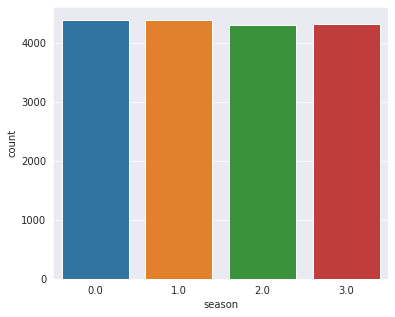

In [19]:
plt.figure(figsize=(6.5,5))
sns.countplot(bike[bike.season.isin(bike.season.value_counts().index)]['season'])

plt.show()

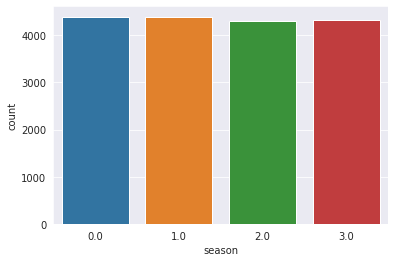

In [ ]:
# season



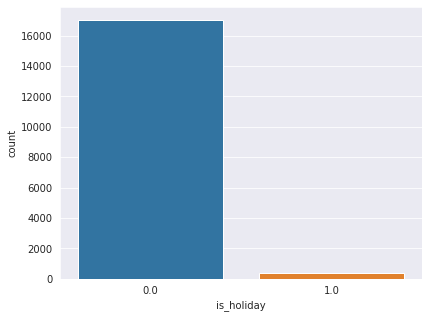

In [20]:
plt.figure(figsize=(6.5,5))
sns.countplot(bike[bike.is_holiday.isin(bike.is_holiday.value_counts().index)]['is_holiday'])

plt.show()

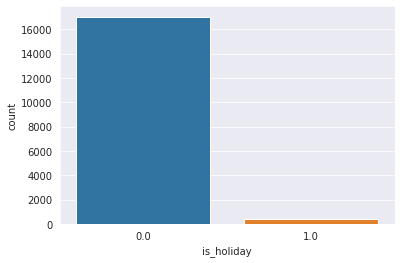

In [ ]:
# is_holiday


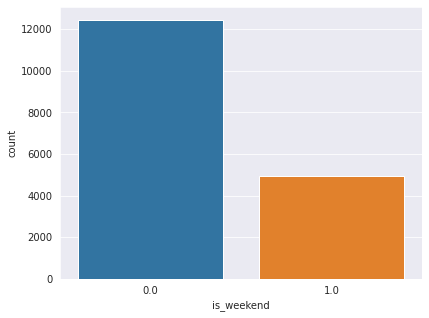

In [21]:
plt.figure(figsize=(6.5,5))
sns.countplot(bike[bike.is_weekend.isin(bike.is_weekend.value_counts().index)]['is_weekend'])

plt.show()

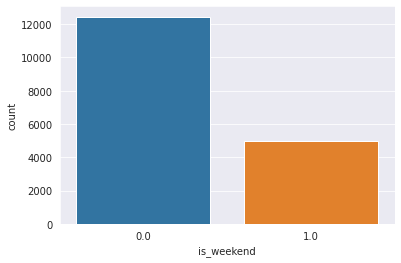

In [ ]:
# is_weekend


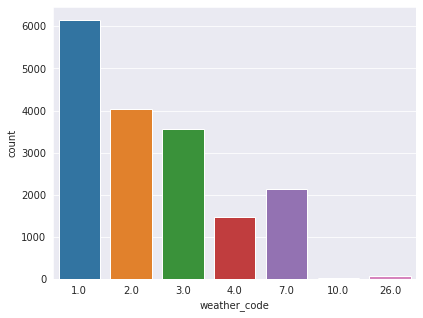

In [22]:
plt.figure(figsize=(6.5,5))
sns.countplot(bike[bike.weather_code.isin(bike.weather_code.value_counts().index)]['weather_code'])

plt.show()

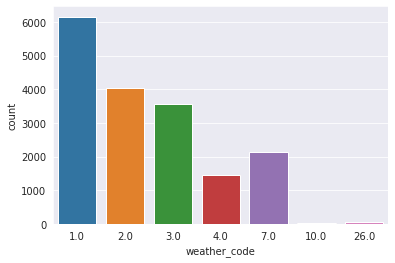

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [25]:
bike["timestamp"].value_counts()

2015-01-04 00:00:00    1
2016-05-04 12:00:00    1
2016-05-04 18:00:00    1
2016-05-04 17:00:00    1
2016-05-04 16:00:00    1
                      ..
2015-09-03 17:00:00    1
2015-09-03 18:00:00    1
2015-09-03 19:00:00    1
2015-09-03 20:00:00    1
2017-01-03 23:00:00    1
Name: timestamp, Length: 17414, dtype: int64

In [28]:
bike.groupby(bike["timestamp"]).count().head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,1,1,1,1,1,1,1,1,1
2015-01-04 01:00:00,1,1,1,1,1,1,1,1,1
2015-01-04 02:00:00,1,1,1,1,1,1,1,1,1
2015-01-04 03:00:00,1,1,1,1,1,1,1,1,1
2015-01-04 04:00:00,1,1,1,1,1,1,1,1,1


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [57]:
bike_1= bike.copy()

In [58]:
bike_1["timestamp"] = pd.to_datetime(bike_1["timestamp"])
bike_1.set_index("timestamp", inplace = True)

bike_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [37]:
bike_2= bike.copy()

In [38]:
bike_2["timestamp"]=bike_2["timestamp"].astype("datetime64")

In [21]:
bike_2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


you can use strftime('%Y-%m') for year_mount

In [42]:
bike_2["year"]=bike_2["timestamp"].dt.strftime("%Y")

In [43]:
bike_2["month"]=bike_2["timestamp"].dt.strftime("%m")

In [44]:
bike_2["hour"]=bike_2["timestamp"].dt.strftime("%I")

In [45]:
bike_2["year_month"]=bike_2["timestamp"].dt.strftime("'%Y-%m'")

In [46]:
bike_2["day_of_month"]=bike_2["timestamp"].dt.strftime("%d")

In [47]:
bike_2["day_of_week"]=bike_2["timestamp"].dt.strftime("%w")

In [48]:
bike_2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,year_month,year,month,hour,day_of_month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,'2015-01',2015,01,12,04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,0,'2015-01',2015,01,01,04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,0,'2015-01',2015,01,02,04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,0,'2015-01',2015,01,03,04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,0,'2015-01',2015,01,04,04


In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [49]:
bike_3=bike_2.drop("year_month", inplace=True, axis=1)


In [50]:
bike_3=bike_2.drop("timestamp", inplace=True, axis=1)

In [61]:
bike_1["year_month"] = bike_1.index.strftime('%Y-%m')
bike_1["year"] = bike_1.index.year
bike_1["month"] = bike_1.index.month
bike_1["day_of_month"] = bike_1.index.day
bike_1["day_of_week"] = bike_1.index.day_of_week
bike_1["hour"] = bike_1.index.hour


### 7.Visualize the correlation with a heatmap

In [55]:
deneme1=sns.heatmap(bike_3 , linewidth = 0.5 , cmap = 'coolwarm' ) #olmadı
deneme1

ValueError: ignored

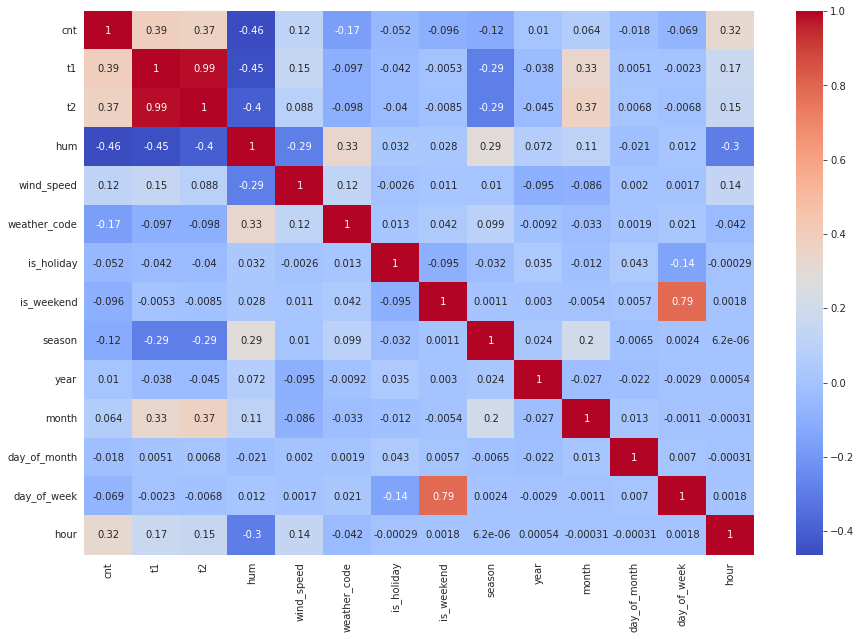

In [62]:
bike_1_hmap = bike_1.drop("year_month", axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(bike_1.corr(), annot = True, cmap = 'coolwarm')

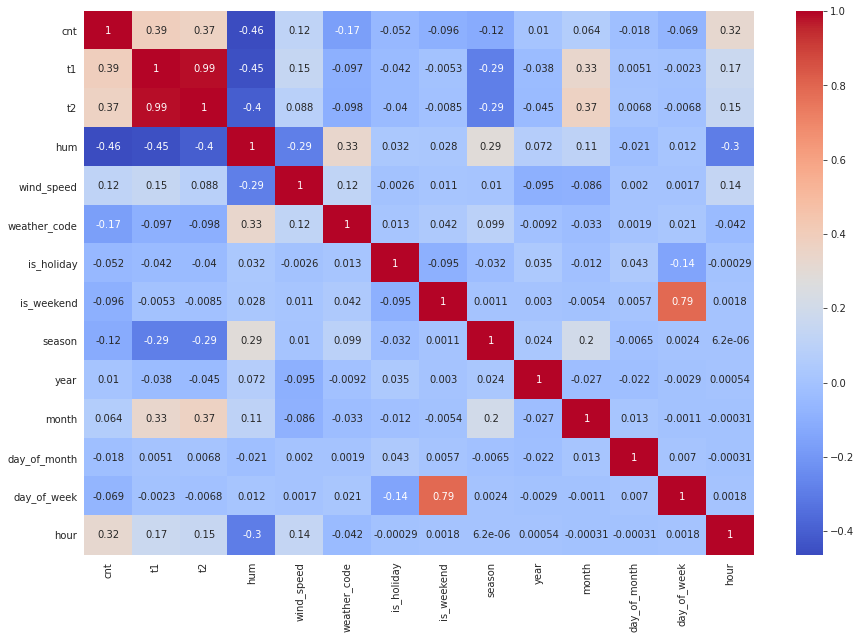

In [ ]:
# for all variables 


In [76]:
target_variable = round(bike_1_hmap.corr().iloc[0].sort_values(ascending=False), 3)
target_variable

cnt             1.000
t1              0.389
t2              0.369
hour            0.324
wind_speed      0.116
month           0.064
year            0.010
day_of_month   -0.018
is_holiday     -0.052
day_of_week    -0.069
is_weekend     -0.096
season         -0.116
weather_code   -0.167
hum            -0.463
Name: cnt, dtype: float64

In [71]:
tvindex=target_variable.index

In [77]:
tv_values = target_variable.values.round(2)

In [82]:
tv_bike = pd.DataFrame({"Cnt": [ 1.   ,  0.389,  0.369,  0.324,  0.116,  0.064,  0.01 , -0.018,
                                   -0.052, -0.069, -0.096, -0.116, -0.167, -0.463]},
                                    index=['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
                                    'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
                                    'weather_code', 'hum'])

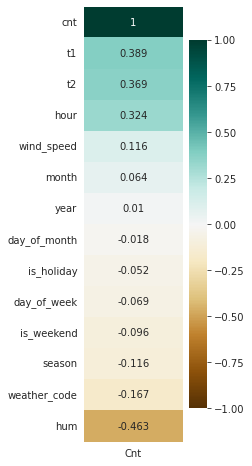

In [83]:
plt.figure(figsize=(2.2,8))
sns.heatmap(tv_bike, vmin=-1, vmax=1, annot=True, fmt="g", cmap = 'BrBG')
plt.show()

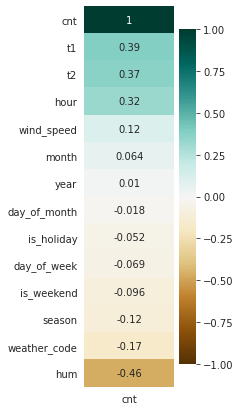

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

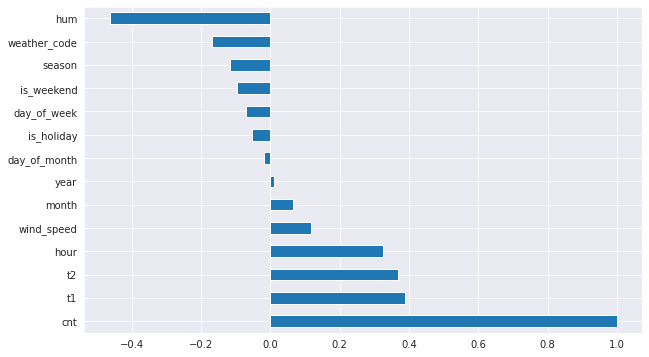

In [87]:
plt.figure(figsize=(10,6))
target_variable.plot(x = tvindex, y = tv_values[::-1], kind = "barh", figsize = (10,6)); # [::-1] veya .T yazdığım halde tersi çıktı.

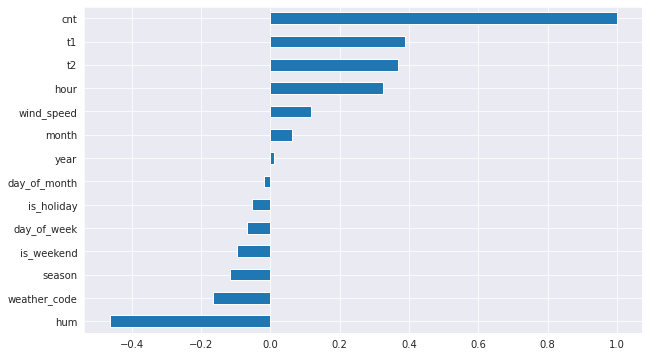

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

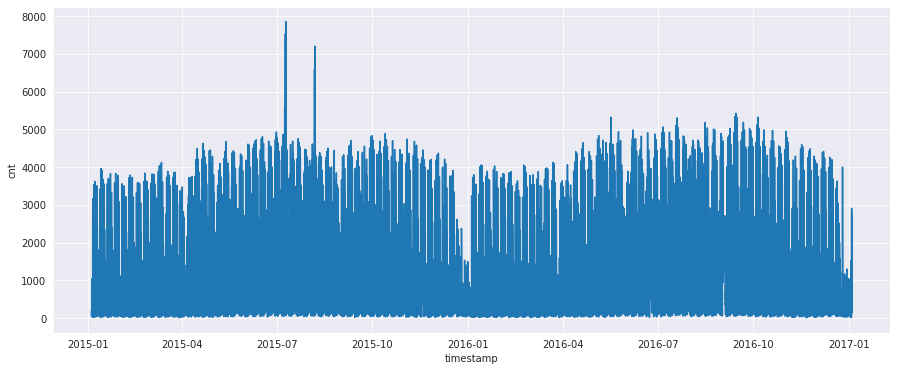

In [89]:
plt.figure(figsize=(15,6))
sns.lineplot(data = bike_1, x = bike_1.index, y = "cnt")

plt.show()

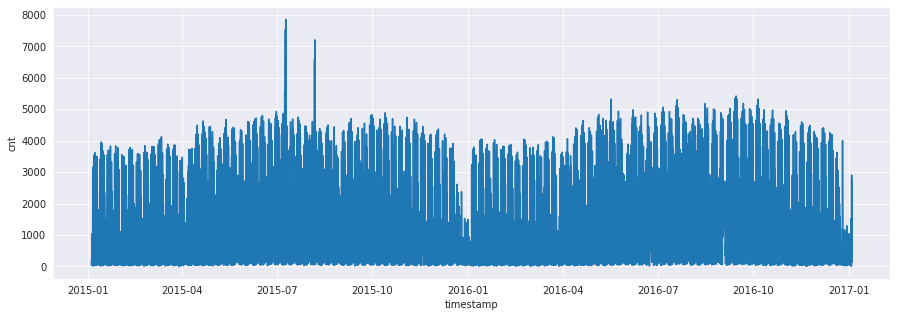

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

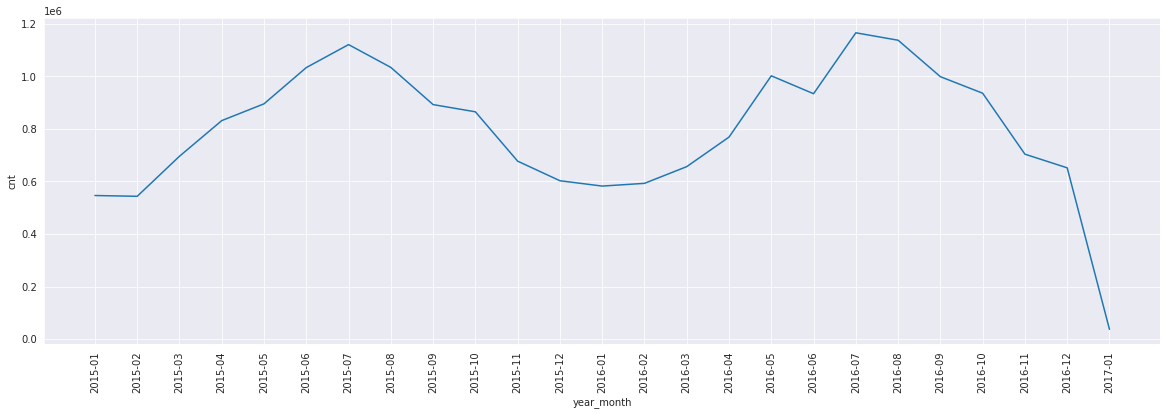

In [90]:
plt.figure(figsize = (20,6))
sns.lineplot(data = bike_1, x = "year_month", y = "cnt", estimator = 'sum', ci = None)
plt.xticks(rotation = 90)

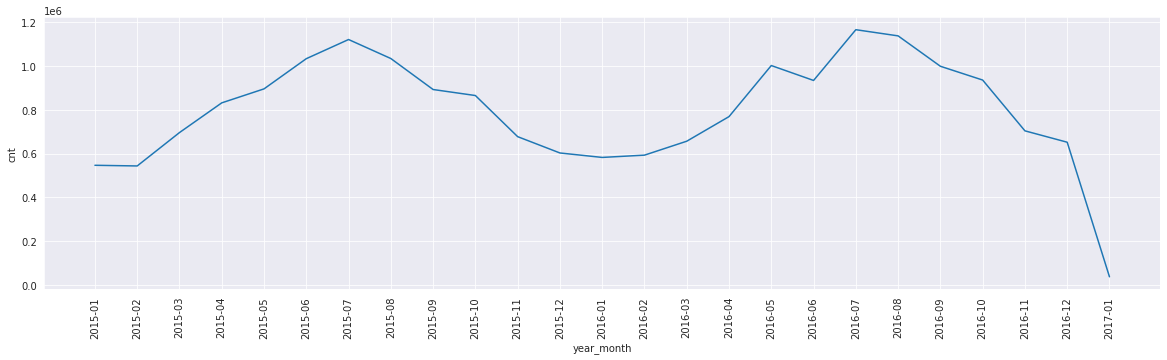

In [ ]:
# with lineplot


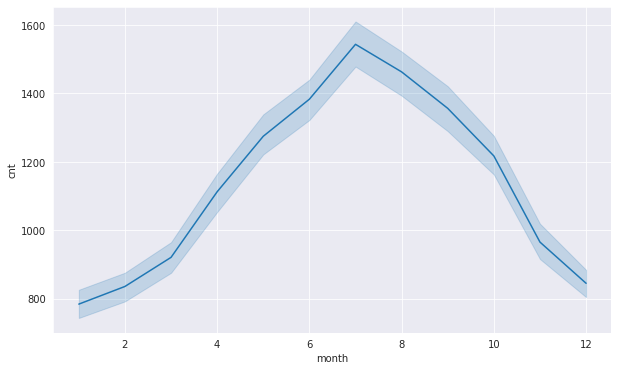

In [92]:
plt.figure(figsize=(10,6))
sns.lineplot(data = bike_1, x = "month", y = "cnt");

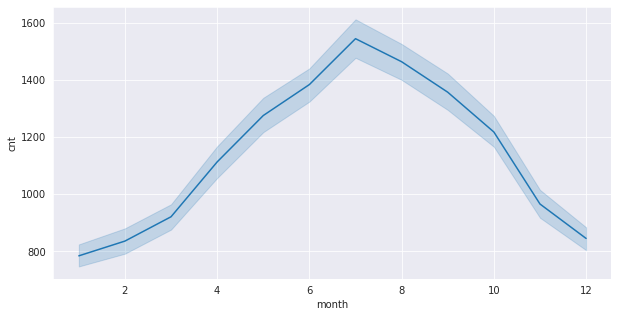

In [ ]:
# with lineplot


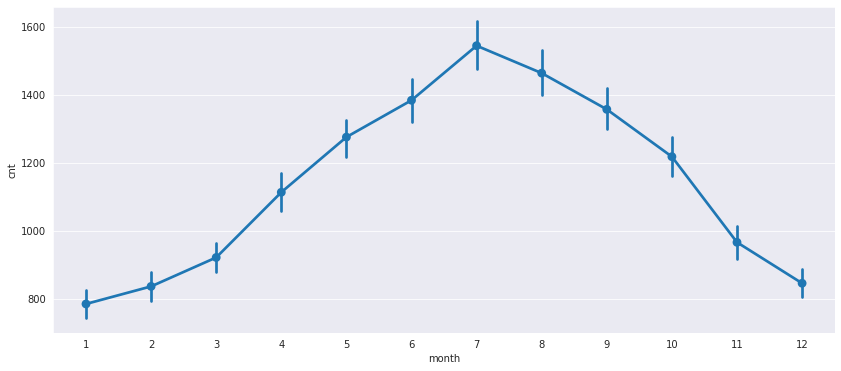

In [96]:
plt.figure(figsize=(14,6))
sns.pointplot(data=bike_1, x = "month", y = "cnt",  markers = "o");

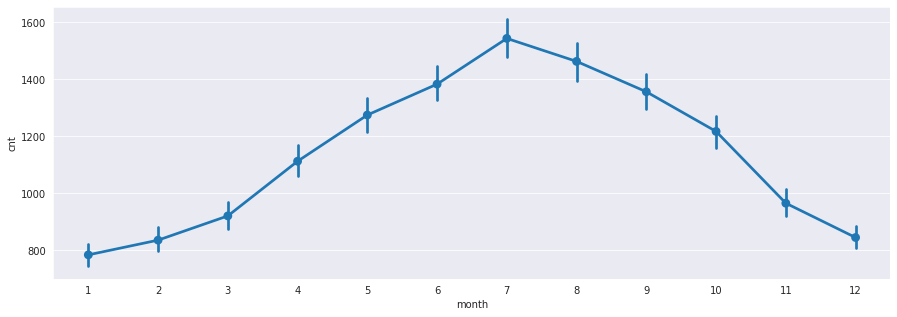

In [ ]:
# with pointplot


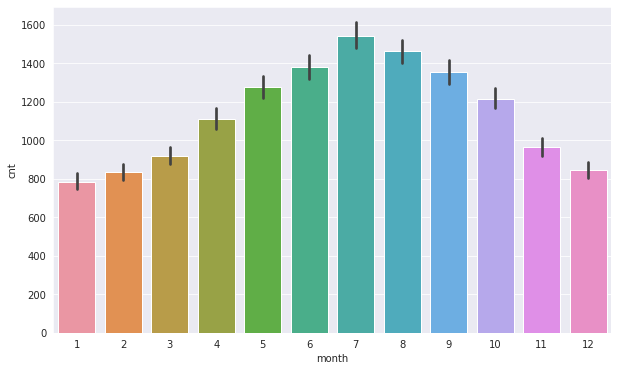

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data = bike_1, x = "month", y = "cnt");


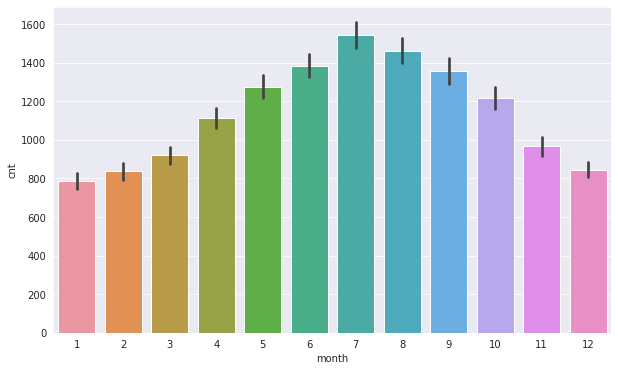

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

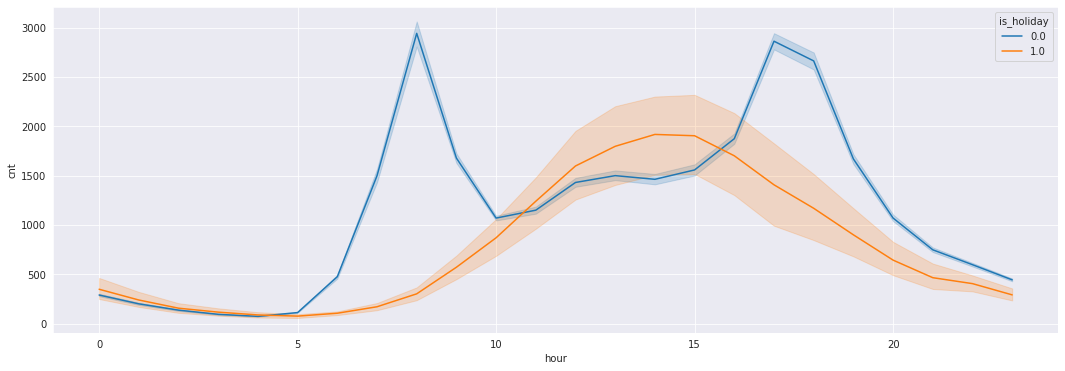

In [102]:
plt.figure(figsize=(18,6))
sns.lineplot(data = bike_1, x = "hour", y = "cnt", hue = "is_holiday");

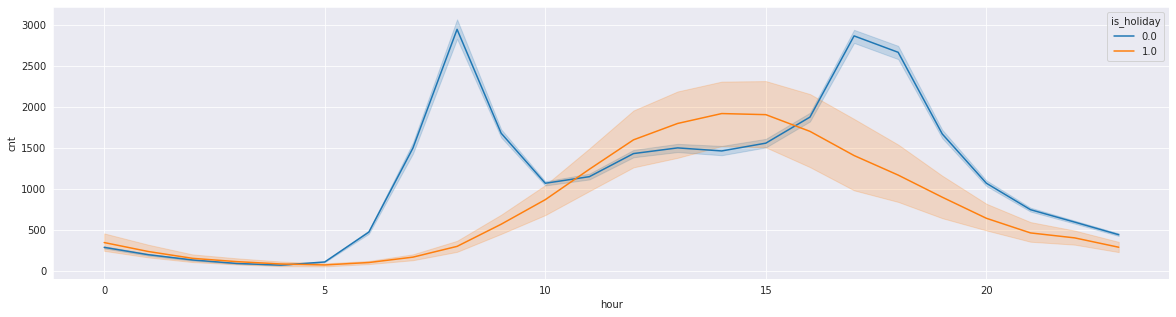

In [ ]:
# with lineplot (*whether it is a holiday or not*)


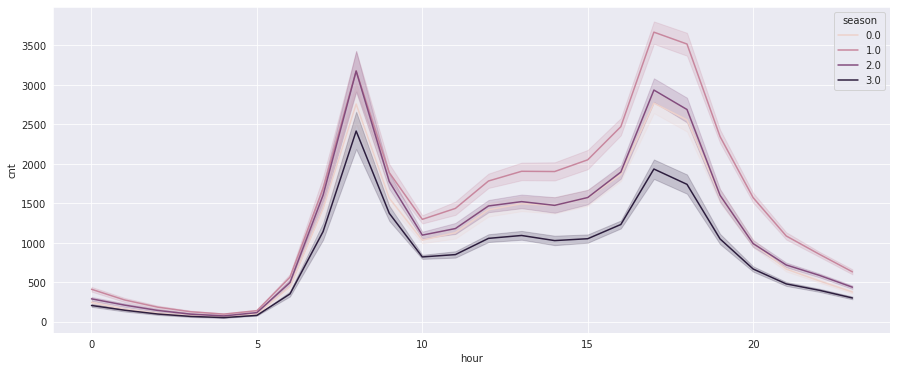

In [105]:
plt.figure(figsize=(15,6))
sns.lineplot(data = bike_1, x = "hour", y = "cnt", hue = "season");

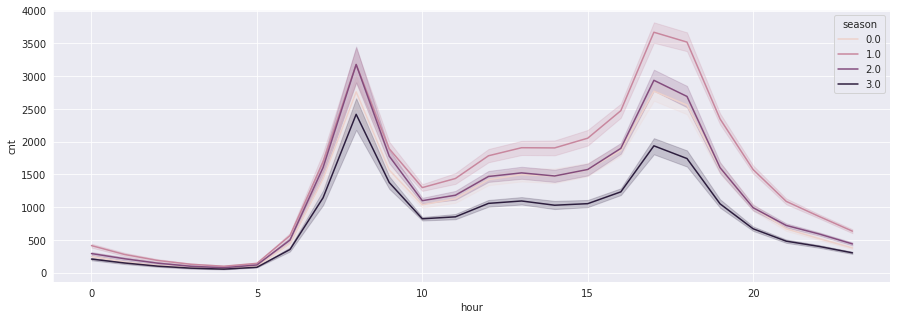

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


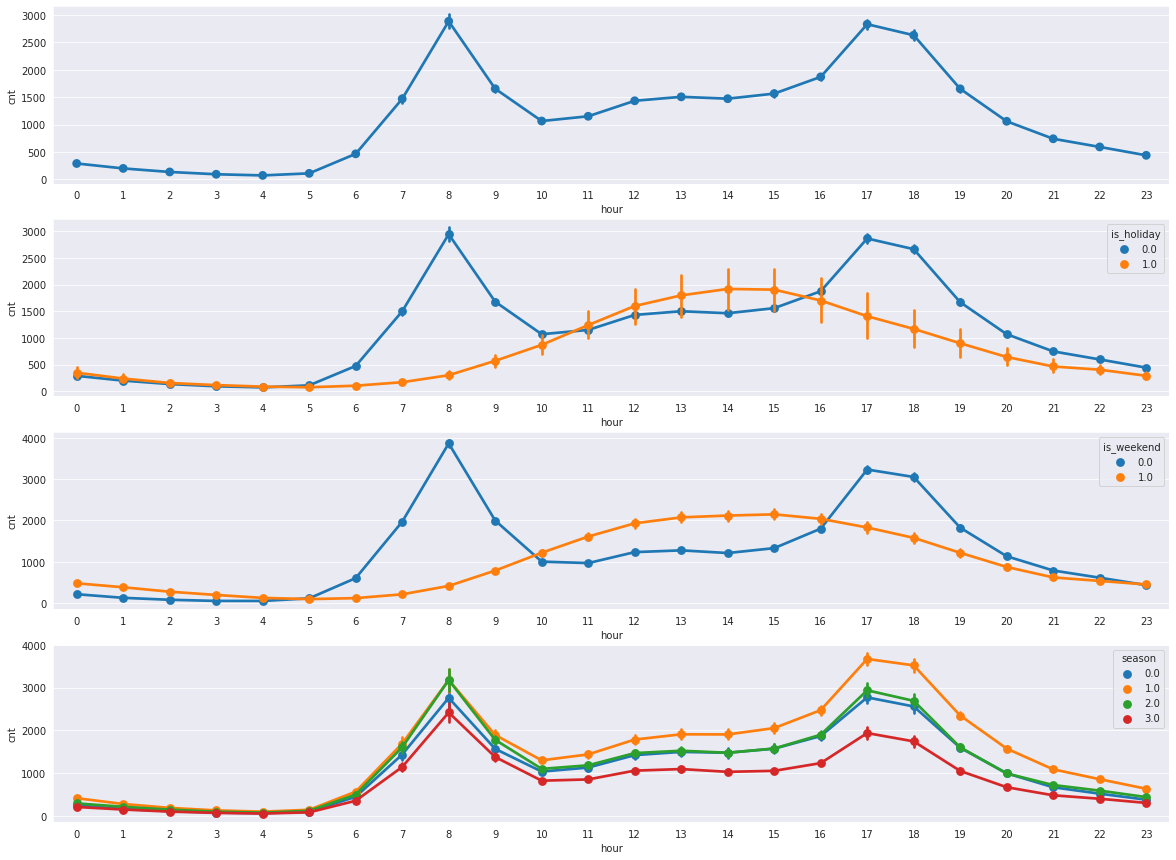

In [107]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15,15))
sns.pointplot(data = bike_1, x = "hour", y = "cnt", ax = ax[0])
sns.pointplot(data = bike_1, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[1])
sns.pointplot(data = bike_1, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[2])
sns.pointplot(data = bike_1, x = "hour", y = "cnt", hue = "season", ax = ax[3]);

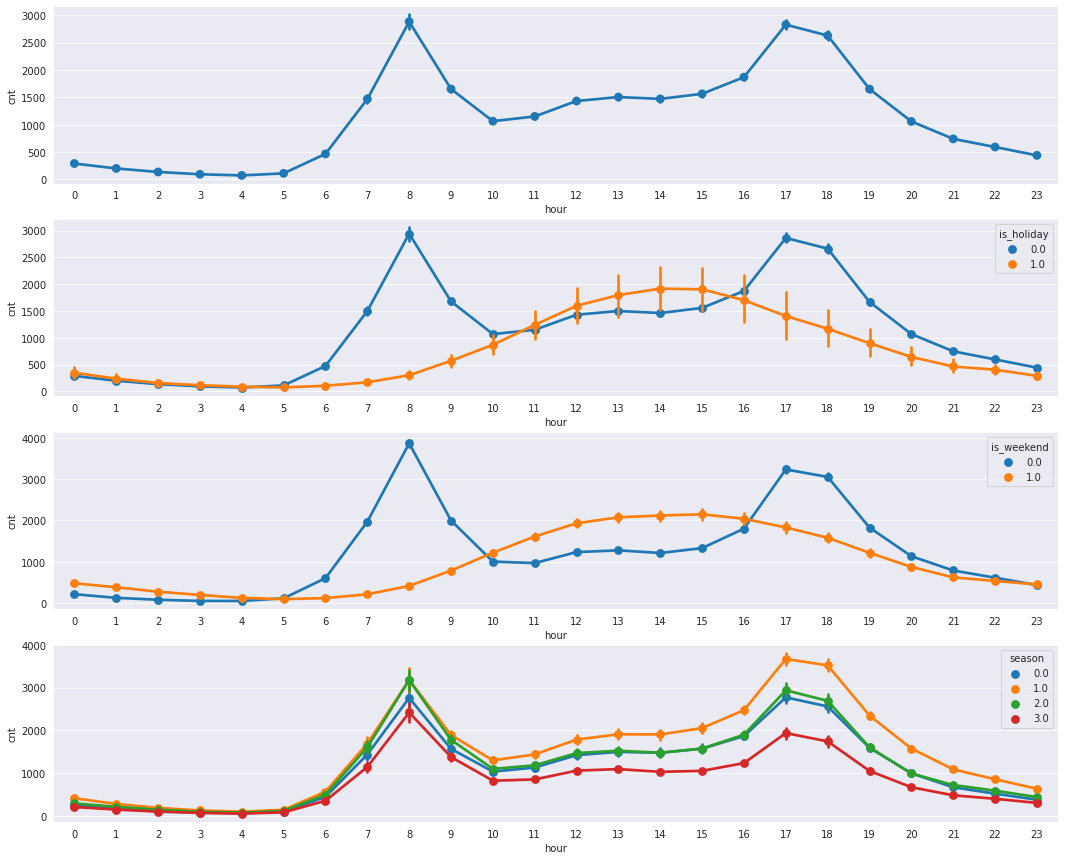

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

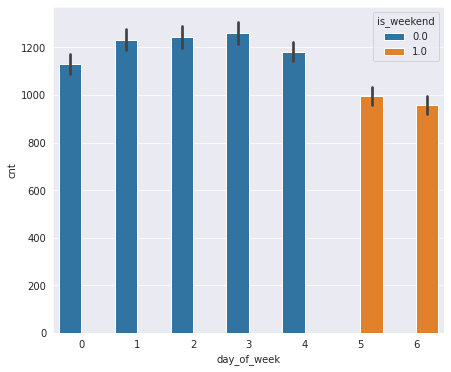

In [110]:
plt.figure(figsize=(7,6))
sns.barplot(data = bike_1, x = "day_of_week", y = "cnt", hue = "is_weekend");

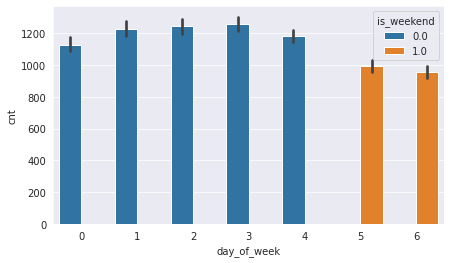

In [ ]:
# with barplot


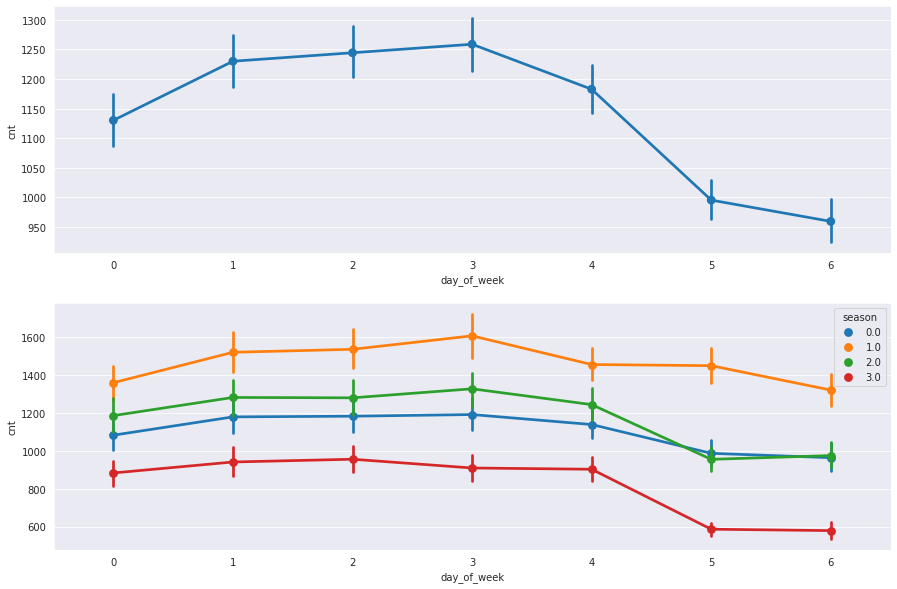

In [113]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,10))
sns.pointplot(data = bike_1, x = "day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data = bike_1, x = "day_of_week", y = "cnt", hue = "season", ax = ax[1]);

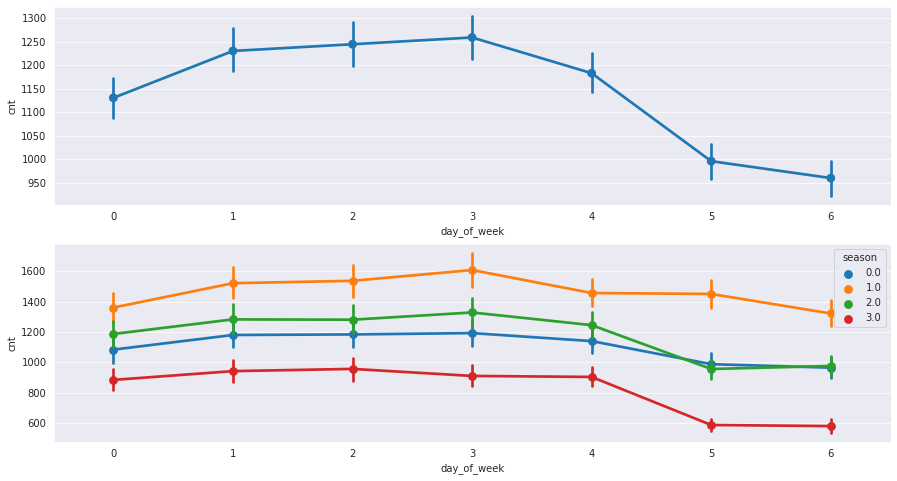

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

In [114]:
Totaldof = bike_1.groupby('day_of_month')[['cnt']].mean().astype('int').T

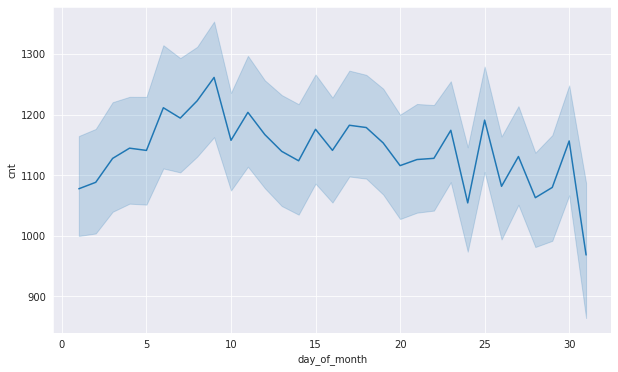

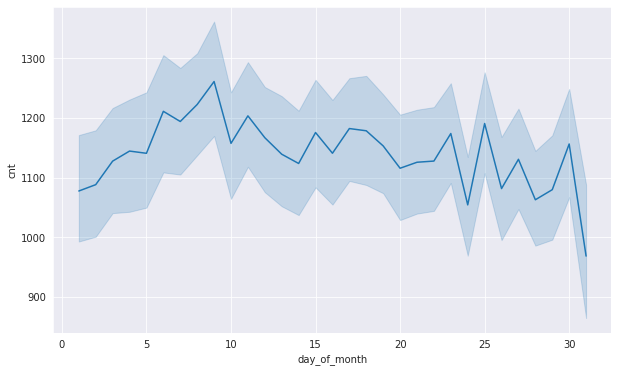

In [116]:
plt.figure(figsize=(10,6))
sns.lineplot(data = bike_1, x = "day_of_month", y = "cnt", ); #2 tane çizdi?

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


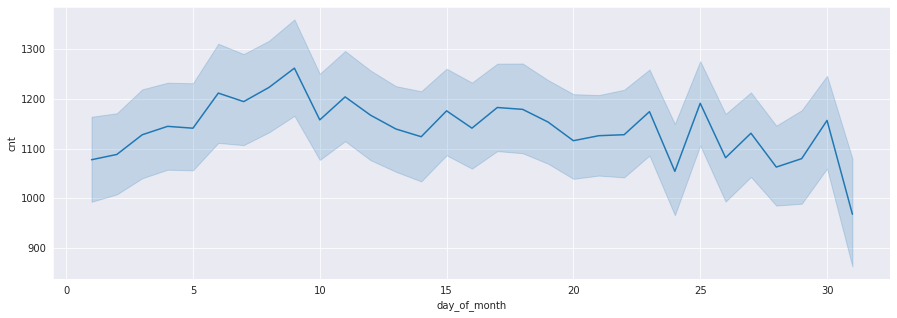

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

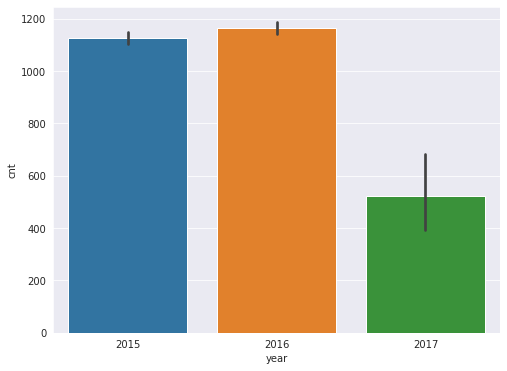

In [119]:
plt.figure(figsize=(8,6))
sns.barplot(data = bike_1, x = "year", y = "cnt", )

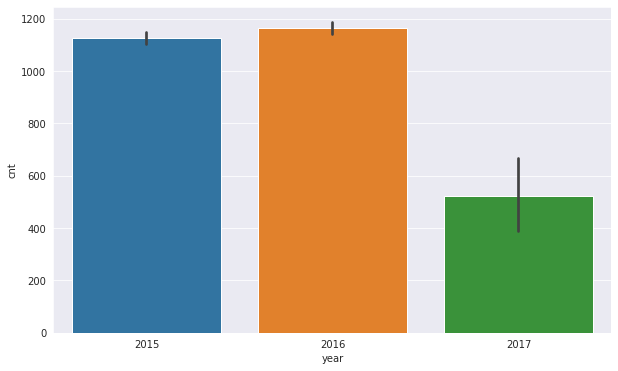

In [ ]:
# with barplot


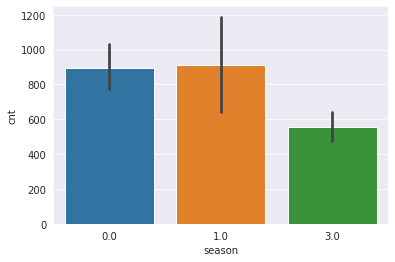

In [121]:

sns.barplot(data = bike_1[bike_1["is_holiday"]==1.0], x = "season", y = "cnt")

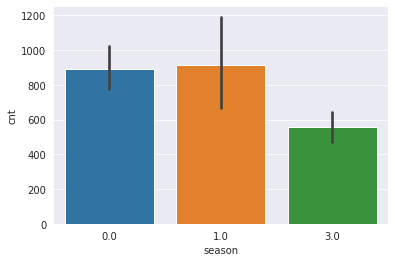

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [122]:
bike_1.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [123]:
bike_1.is_weekend.unique()

array([1., 0.])

In [125]:
bike_1.groupby(bike_1["is_weekend"]).count()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,season,year_month,year,month,day_of_month,day_of_week,hour
is_weekend,,,,,,,,,,,,,,
0.0,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444
1.0,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970


In [126]:
Toplamweekend= bike_1.groupby(bike_1["is_weekend"]).count().sort_values(by="cnt", ascending=False)
Toplamweekend

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,season,year_month,year,month,day_of_month,day_of_week,hour
is_weekend,,,,,,,,,,,,,,
0.0,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444,12444
1.0,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970


In [127]:
Toplamweekend.index

Float64Index([0.0, 1.0], dtype='float64', name='is_weekend')

In [128]:
steptwo=Toplamweekend["cnt"].value_counts().index.sort_values(ascending=False)
steptwo

Int64Index([12444, 4970], dtype='int64')

([<matplotlib.patches.Wedge at 0x7fa2c8579d50>,
 [Text(-0.8926849648293668, 1.117145269679639, 'weekday'),
  Text(0.8926849648293665, -1.117145269679639, 'weekend')],
 [Text(-0.48691907172510906, 0.609351965279803, '71.5%'),
  Text(0.486919071725109, -0.609351965279803, '28.5%')])

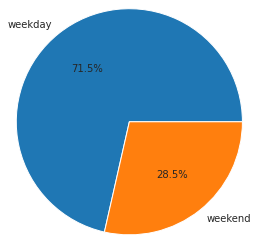

In [144]:
plt.pie(steptwo, labels=["weekday","weekend"],radius=1.3, autopct="%0.1f%%")

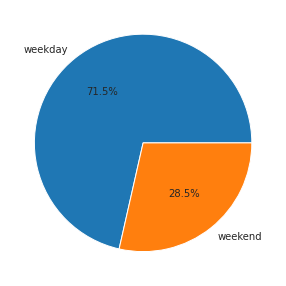

In [ ]:
# pie chart

TypeError: ignored

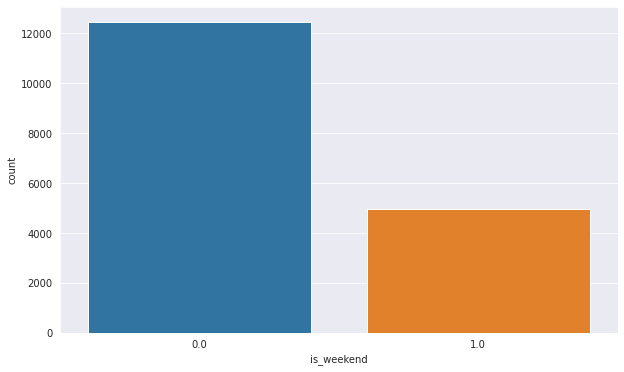

In [136]:
plt.figure(figsize=(10,6))
Grafik=sns.countplot(data = bike_1, x = "is_weekend");
for bar in Grafik:
  plt.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points', fontsize=10)
plt.show()

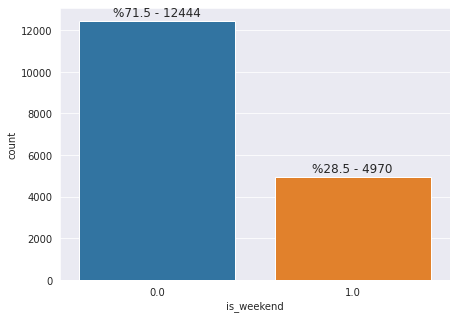

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

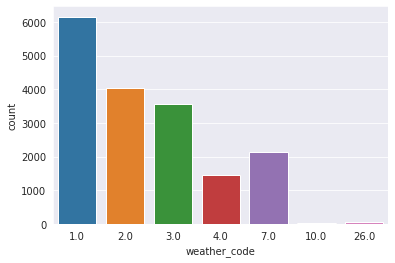

In [138]:
sns.countplot(data = bike_1, x = "weather_code");

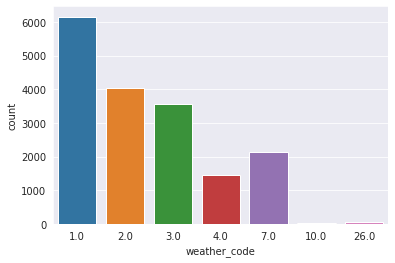

In [ ]:
# with countplot


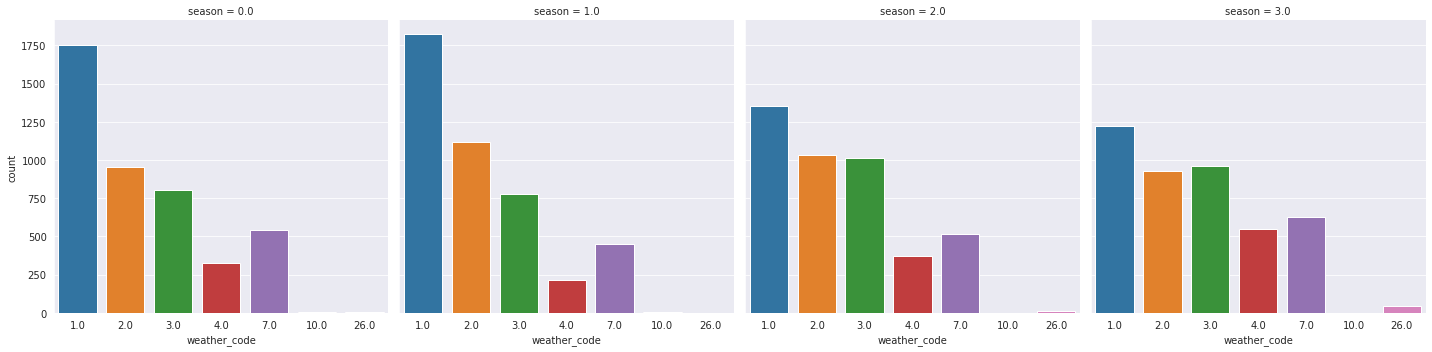

In [142]:
sns.catplot(data = bike_1, x = "weather_code", col="season", kind="count");

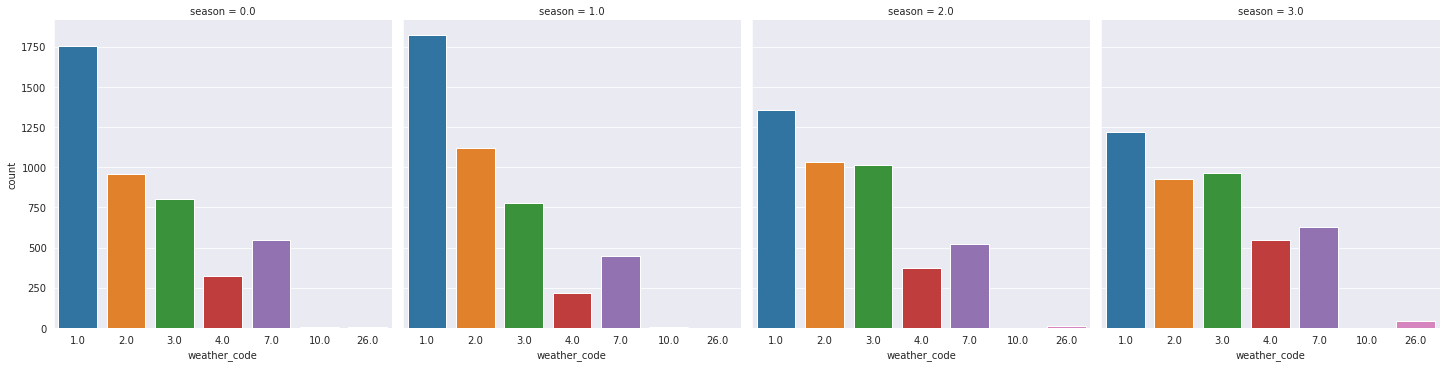

In [ ]:
# with catplot


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___